# Spring DATA 602 - Semester Project
### Puneet Auluck

In the early 19th century, various types of alcohol consumption increased in America because of overabundance of corn available in the Western region. Today alcohol is a critical part of American diet. It is readily available than ever. We do not have data from earlier period, but World Health Org. has recent data from 2000-2010 that we can use to examine if there is an increasing trend in alcohol consumption in America. The data also contains information on other countries. We will also look at how it has affected throughout the globe.

Data Source: http://apps.who.int/gho/data/node.main.A1026?lang=en

Uploaded to Github: https://raw.githubusercontent.com/pauluck/602/master/al.csv

### Load data file using pandas library

In [29]:
# http://rpubs.com/puneetauluck/172712
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# alraw = pd.read_csv('https://raw.githubusercontent.com/pauluck/602/master/al.csv', 
#                    names=['country','datasource','bev_type','2013',
#                            '2012','2011','2010','2009',
#                            '2008','2007','2006','2005',
#                            '2004','2003','2002','2001','2000'], index_col=False)

alraw = pd.read_csv('https://raw.githubusercontent.com/pauluck/602/master/al.csv')

print "\nRaw Alchohol consumption data."
print "Displaying first few lines..."

display(alraw.head())


Raw Alchohol consumption data.
Displaying first few lines...


,Country,Data Source,Beverage Types,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Data source,All types,NaN,NaN,NaN,0.00,0.00,0.03,0.02,0.03,0.01,0.01,0.01,0.00,0.00,0.00
1,Afghanistan,Data source,Beer,NaN,NaN,NaN,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Data source,Wine,NaN,NaN,NaN,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,Data source,Spirits,NaN,NaN,NaN,0.00,0.00,0.02,0.00,0.02,0.01,0.01,0.01,0.00,0.00,0.00
4,Afghanistan,Data source,Other alcoholic beverages,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Drop columns not needed

In [30]:
# drop columns that contain bad data or we don't need
al = alraw.drop(alraw.columns[[1,3,4,5]], axis=1)

# drop `Other alchoholic beverages` records which mostly contains no data
al = al[al['Beverage Types'] != 'Other alcoholic beverages']

# fill NaN values with zeros
al = al.fillna(0)

print ""
display(al.head())

,Country,Beverage Types,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,All types,0.00,0.00,0.03,0.02,0.03,0.01,0.01,0.01,0.00,0.00,0.00
1,Afghanistan,Beer,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Wine,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,Spirits,0.00,0.00,0.02,0.00,0.02,0.01,0.01,0.01,0.00,0.00,0.00
5,Albania,All types,4.98,5.58,5.36,5.22,5.04,4.91,4.41,4.27,3.94,4.54,3.96


### <span style="color:red">Melt</span> data to plot easily

In [31]:
almelted = pd.melt(al, id_vars=["Country","Beverage Types"], var_name="Year", value_name="Consumption")

# remove rows that contain "no data" in Consumption
almelted = almelted[almelted['Consumption'] != 'No data']

display(almelted.head(20))


,Country,Beverage Types,Year,Consumption
0,Afghanistan,All types,2010,0.00
1,Afghanistan,Beer,2010,0.00
2,Afghanistan,Wine,2010,0.00
3,Afghanistan,Spirits,2010,0.00
4,Albania,All types,2010,4.98
5,Albania,Beer,2010,1.58
6,Albania,Wine,2010,0.98
7,Albania,Spirits,2010,2.41
8,Algeria,All types,2010,0.11
9,Algeria,Beer,2010,0.07


### Convert `year` and `consumption` columns to integers

In [32]:
almelted['Year'] = almelted['Year'].astype(int)
almelted['Consumption'] = almelted['Consumption'].astype(float)


#### Analyze US data

In [33]:
us = almelted.loc[almelted['Country'] == 'United States of America']
display(us.head())


,Country,Beverage Types,Year,Consumption
751,United States of America,All types,2010,8.55
752,United States of America,Beer,2010,4.28
753,United States of America,Wine,2010,1.48
754,United States of America,Spirits,2010,2.80
1538,United States of America,All types,2009,8.67


#### What is the <span style="color:red">average</span> consumption in US for beer, wine and spirits?

In [34]:

us.groupby(['Country','Beverage Types']).agg({'Consumption':[np.mean]})

Consumption
                                               mean
Country                  Beverage Types            
United States of America All types         8.504545
                         Beer              4.539091
                         Spirits           2.624545
                         Wine              1.341818

In [35]:
# Sort year values
us = us.sort_values(['Year'])

# pull out beer, wine and spirits records
beer = us[us['Beverage Types'] == 'Beer']
wine = us[us['Beverage Types'] == 'Wine']
spirits = us[us['Beverage Types'] == 'Spirits']


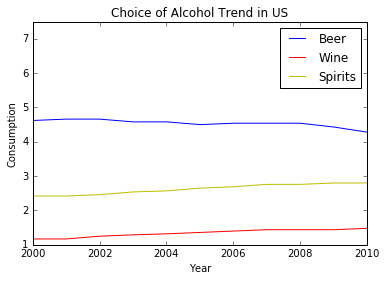

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(beer['Year'],beer['Consumption'], 'b-', label='Beer')
plt.plot(wine['Year'], wine['Consumption'], 'r-', label = 'Wine')
plt.plot(spirits['Year'], spirits['Consumption'], 'y-', label='Spirits')
plt.legend(loc='upper right')
plt.title('Choice of Alcohol Trend in US')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.ylim(1.0,7.5)
plt.show()

#### I have created a line plot.  The blue line indicates beer and from the plot, we can tell that beer is consumed the most, followed by wine. However, from year 2000 to 2010, the beer consumption is declining where as consumption for wine and spirits is rising.

### How does American consumption compare to its neighbor country, Canada?

Country                   Beverage Types
Canada                    All types         7.918182
                          Beer              4.200000
                          Spirits           2.145455
                          Wine              1.572727
United States of America  All types         8.504545
                          Beer              4.539091
                          Spirits           2.624545
                          Wine              1.341818
Name: Consumption, dtype: float64


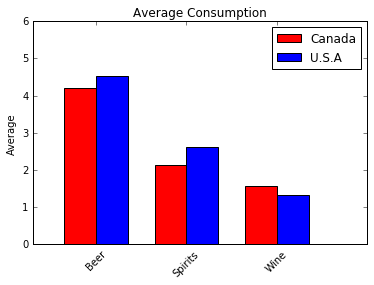

In [37]:
# Get US and Canada data
usvscan = almelted.loc[almelted['Country'].isin(['United States of America','Canada'])]

# Find the average for each bev. type
avg = usvscan.groupby(['Country','Beverage Types'])['Consumption'].mean()

print(avg)
cnavg = avg[1:4]
usavg = avg[5:8]

# make a bar plot 
N = 3

fig = plt.figure()
ax = fig.add_subplot(111)

ind = np.arange(N)                # the x locations for the groups
width = 0.35  

rects1 = ax.bar(ind, cnavg, width,color='red')

rects2 = ax.bar(ind+width, usavg, width,color='blue')

ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,6)
ax.set_ylabel('Average')
ax.set_title('Average Consumption')
xTickMarks = ['Beer','Spirits','Wine']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Canada', 'U.S.A') )

plt.show()




#### The average consumption for Canada and US are very close.  Beer appears to be the most popular choice.  In Canada, the average wine drinker is few points higher than America.

###How is the consumption around the world?

In [38]:
alltypes = almelted[almelted['Beverage Types'] == 'All types']
us.groupby(['Beverage Types']).agg({'Consumption':[np.mean]})

,Consumption
,mean
Beverage Types,
All types,8.504545
Beer,4.539091
Spirits,2.624545
Wine,1.341818


#### Beer remains the most favorite alcohol type.  The trend around the world is very similar to USA.

### How is the average consumption around the world? Plot it on a map

First, we will categorize the data.  Based on the average (mean) of `All types` and its standard deviation, we will compare how the consumption is for each country.  
If it is higher than 1 standard deviation, it will be marked as 3 (high), if within 1 standard deviation, it will be marked 2 (low) and lower than 1 standard deviation will be marked as 1(low.)

In [39]:
# remove warnings for now
pd.options.mode.chained_assignment = None

# find mean and standard deviation of total alcohol consumed around the world
m = alltypes['Consumption'].mean()
sd = alltypes['Consumption'].std()

# create function to categorize data
# if consumption is higher than the mean and sd, then it is set as 3 (high)
# if consumption is lower than difference of mean and sd, then it is set to 1 (low)
# else the consumption is 2 (mid)
def checkRange(x):
    if x > m + sd:
        v = 3
    elif x < m - sd:
        v = 1
    else:
        v=2
    return v

alltypes['Range'] = [checkRange(x) for x in alltypes['Consumption']]

# Clean-up country value
alltypes['Country'] = ['United States' if x == 'United States of America' else x for x in alltypes['Country']]
display(alltypes.head())

,Country,Beverage Types,Year,Consumption,Range
0,Afghanistan,All types,2010,0.00,1
4,Albania,All types,2010,4.98,2
8,Algeria,All types,2010,0.11,1
12,Andorra,All types,2010,13.31,3
16,Angola,All types,2010,6.20,2


In [40]:
#### How is the average consumption

In [41]:
# read a csv file that contains country codes - we are only interested in country and its code
codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv',
                 names=['Country','drop','Code']) 
alltypes = pd.merge(alltypes, codes, on='Country')
display(alltypes.head())

,Country,Beverage Types,Year,Consumption,Range,drop,Code
0,Afghanistan,All types,2010,0.00,1,21.71,AFG
1,Afghanistan,All types,2009,0.00,1,21.71,AFG
2,Afghanistan,All types,2008,0.03,1,21.71,AFG
3,Afghanistan,All types,2007,0.02,1,21.71,AFG
4,Afghanistan,All types,2006,0.03,1,21.71,AFG


I will be using `plotly` package that hosts the graphs on a remote site.  I needed to get an API key which is used in the following code.  The graph is then embeded on to this notebook 

In [42]:

import plotly.plotly as py
import pandas as pd
from plotly.graph_objs import *

altype = almelted[almelted['Beverage Types'] == 'All types']
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
py.sign_in('pauluck','b4bhgp5rck')
data = [ dict(
        type = 'choropleth',
        locations = alltypes['Code'],
        z = alltypes['Range'],
        text = alltypes['Country'],
       colorscale = [[0,"red"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            )
        ),
        colorbar = dict(
            autotick = False,
            title = 'Consumption Categories: 3-high, 2-med and 1-low'
        ),
    ) ]

layout = dict(
    title = 'World Wide Alcohol Consumption',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
#py.plot( fig, validate=False, filename='d3-world-map' )

# embed the graph
import plotly.tools as tls
tls.embed("https://plot.ly/~pauluck/0")




### Conclusion

#### The alcohol consumption is highest in Australia, also in few European and African countries.  The lowest consumption is in northern region of Africa.  The consumption in North and South America remains average.  The favorite alcohol is beer in America and around the world!